### Import libraries

In [18]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

Get data from Jan 1st 2006 to Jan 1st 2016 for Bank of America, CitiGroup, Goldman Sachs, JPMorgan Chase, Morgan Stanley and Wells Fargo using pandas-data reader for latest API https://pandas-datareader.readthedocs.io/en/latest/remote_data.html


In [19]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [106]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [107]:
#Set ticker for each bank and store in array
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [108]:
#Create a single data frame by concatenating the dataframes 
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [109]:
#Set column names
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [110]:
#Check headers
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.981  41.205  40.308  41.120  18658143.0  431.01  434.32   
2006-01-04   41.051  41.263  40.570  40.684  20331205.0  429.79  431.88   
2006-01-05   40.684  40.903  40.458  40.737  16971119.0  426.06  429.05   
2006-01-06   40.875  40.971  40.485  40.675  14419805.0  429.95  430.10   
2006-01-09   40.806  41.025  40.492  40.702  17882700.0  427.47  428.70   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   423.15  433.55  1748134.0  ...  39.536  40.445  39.233  40.320   
2006-01-04   425.26  425.53  2127119.0  ...  40.595  40.994  40.352  40.352   
2006-01-05   425.71  427.62  1290703.0  ...  40.352  40.518  40.117  40.462   
2006-01-06   423.96  427.62  1557821.0  ...  40.642  40.693  40.144  40.502   
2006-01-09   424.82  425.62  1910873.0  ...  40.541  41.002  40.533  40.926   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6454836.0  23.520  23.801  23.223  23.743  14801667.0  
2006-01-04   9576975.0  23.665  23.680  23.339  23.467  14604966.0  
2006-01-05   6936221.0  23.444  23.482  23.301  23.444  13612309.0  
2006-01-06   8270878.0  23.507  23.645  23.363  23.576  11291370.0  
2006-01-09   4975275.0  23.576  23.680  23.482  23.576   7550515.0  

[5 rows x 30 columns]

### Exploring the data

In [111]:
#Finding out the maximum Close price for the banks throughout the time period
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     47.949
C      496.170
GS     211.900
JPM     60.015
MS      61.752
WFC     48.701
dtype: float64

In [112]:
#Creating a new data frame called returns which contains the returns on each banks stocks
returns = pd.DataFrame()

In [113]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010603,-0.018498,-0.013618,-0.014233,0.000794,-0.011624
2006-01-05,0.001303,0.004912,-0.000368,0.003034,0.002726,-0.000980
2006-01-06,-0.001522,0.000000,0.013903,0.007081,0.000989,0.005630
2006-01-09,0.000664,-0.004677,0.012078,0.016208,0.010469,0.000000


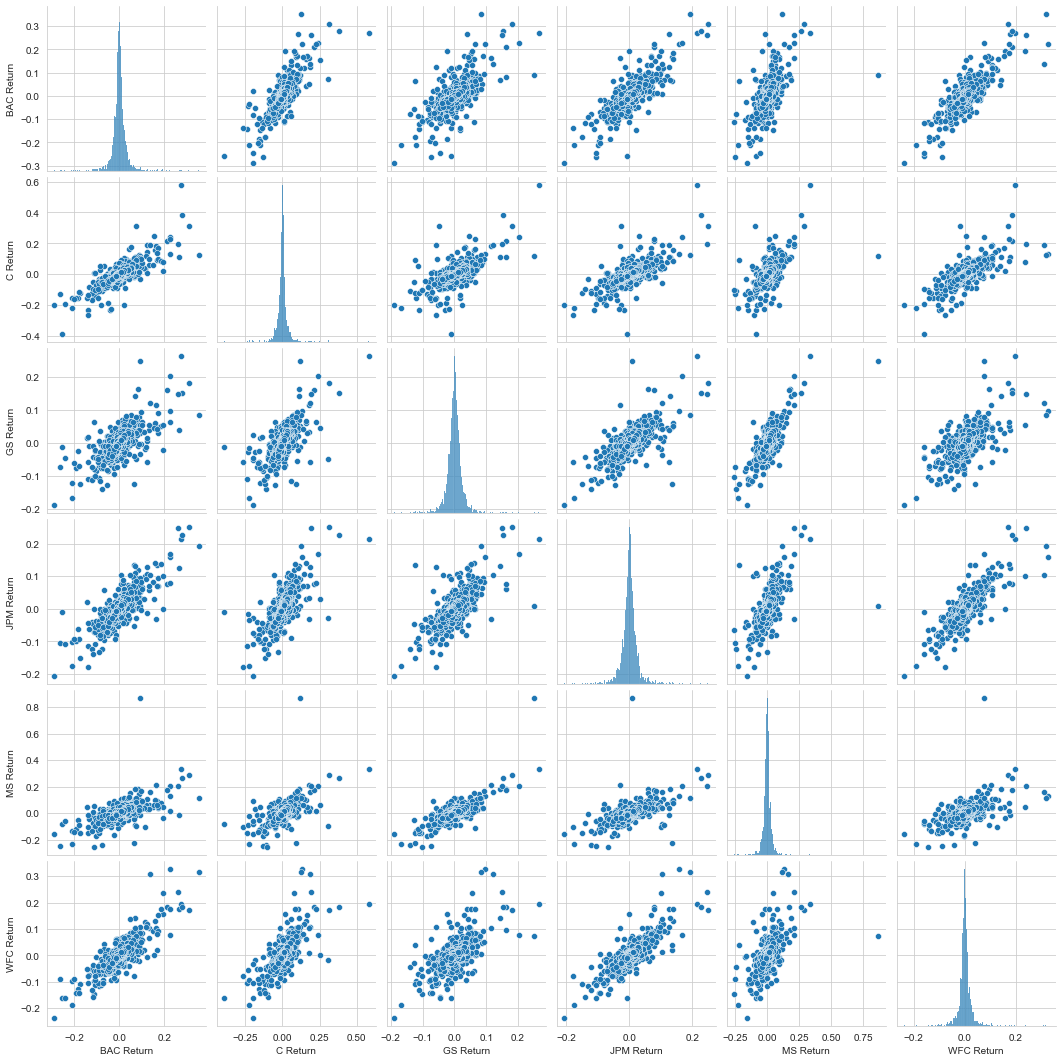

In [114]:
#Visualising the data using pairplot to see any abnormalities in the stock
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

In [115]:
# Worst Drop in Returns
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

We notice that the worst drop for 4 of them happened on the same day: 20-01-2009. What's the significance of that date? Inaugration date.

In [116]:
# Best Single Day Gain
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

We notice that JPM's stock had best day right after inaugration day.

In [135]:
#Finding the riskiest stock
returns.std() 

BAC Return    0.036604
C Return      0.038615
GS Return     0.025370
JPM Return    0.027668
MS Return     0.037705
WFC Return    0.030221
dtype: float64

Citigroup has the riskiest stock

In [121]:
#Finding the riskiest stock in a particular time period
returns.loc['2015-01-01':'2015-12-31'].std() 

BAC Return    0.016146
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016008
WFC Return    0.012549
dtype: float64

We notice that BAC and Morgan Stanley have riskiest stocks in 2015

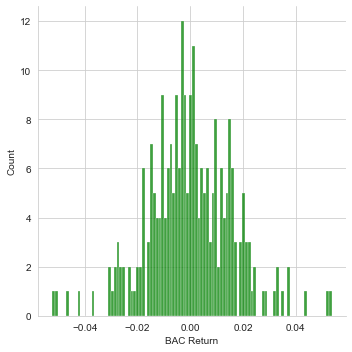

In [136]:
#Creating distplot of BAC for 2015
sns.displot(returns.loc['2015-01-01':'2015-12-31']['BAC Return'],color='green',bins=100)

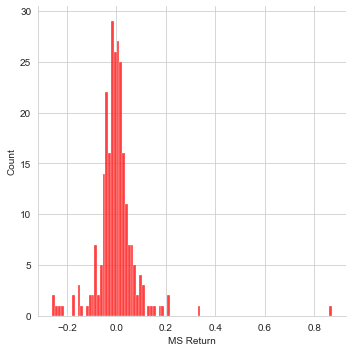

In [137]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['MS Return'],color='red',bins=100)

In [164]:
import plotly
import cufflinks as cf
cf.go_offline()

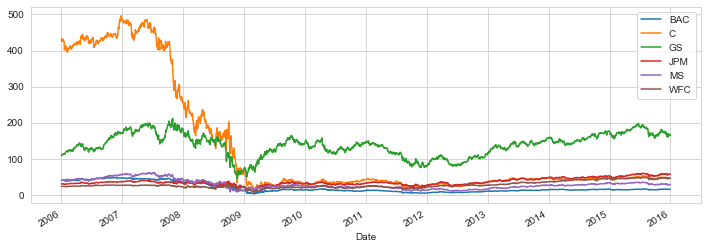

In [140]:
# Visualising the close price over the entire time period using plotly 
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [141]:
# Visualising the close price over the entire time period using plotly 
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

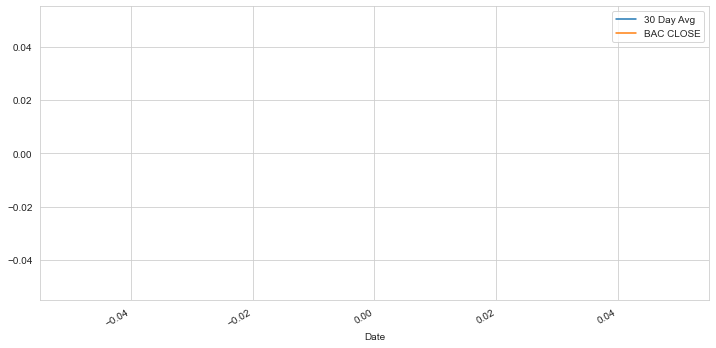

In [165]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

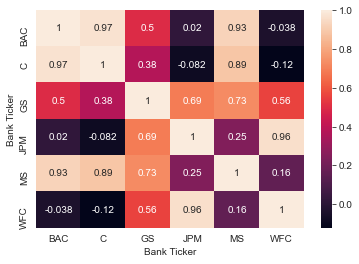

In [130]:
#Creating a heatmap to find correlation between stocks close price
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

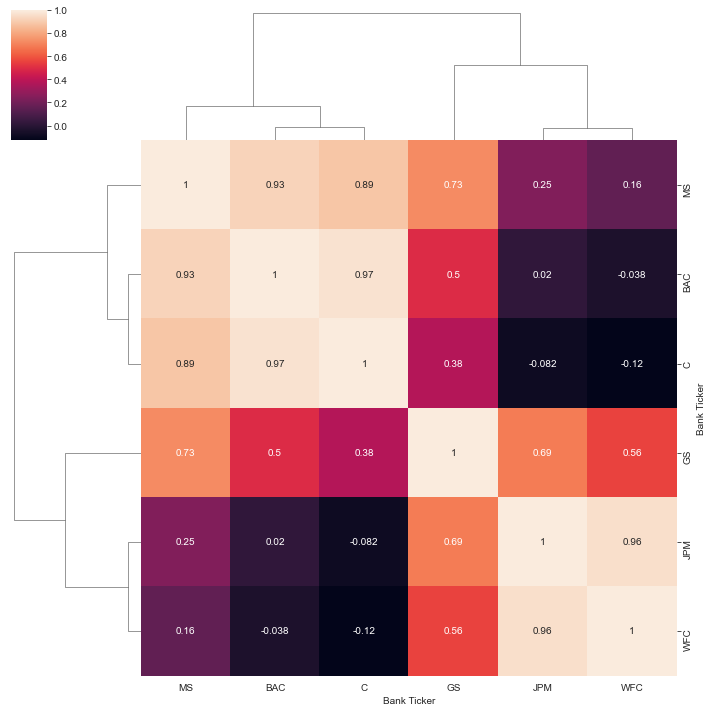

In [131]:
#Using clustermap to cluster the correlations together
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [132]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [163]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind ='candle')

In [148]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')